## Equally-Weighted Portfolio Backtest.

In [4]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.heuristics.equally_weighted import EWStrategy
from run import Dataset, initialize

In [6]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 500

trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=1,
    min_exposure=0,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [7]:
strategy = EWStrategy()

strategy_name = strategy.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [00:56<00:00,  5.03it/s]


StrategyStatistics:
* final_nav = 7.429261
* geom_avg_total_r = 0.111241
* geom_avg_xs_r = 0.082957
* std_xs_r = 0.226559
* min_xs_r = -0.122205
* max_xs_r = 0.127455
* skew = -0.241644
* kurtosis = 10.460132
* max_dd = -0.604276
* sharpe = 0.366160
* alpha_buy_hold = 0.033670
* tracking_error_buy_hold = 0.045147
* ir_buy_hold = 0.745779
* factor_loadings = {'low_risk': -0.29184642621501367, 'momentum': 0.06470602327053933, 'quality': 0.022571833974193812, 'size': 0.02753643467574644, 'value': 0.14706779092158573, 'spx': 0.9265702943696813}
* alpha_benchmark = 0.037968
* alpha_benchmark_pvalue = 0.000031
* tracking_error_benchmark = 0.036966
* ir_benchmark = 1.027114
* ttest_pval = 0.321147
* levene_pval = 0.004581
* timing_ability_coef = -0.025272
* timing_ability_pval = 0.000408

In [8]:
result.std_xs_r, result.sharpe

(0.2265588166462257, 0.36615954556019803)

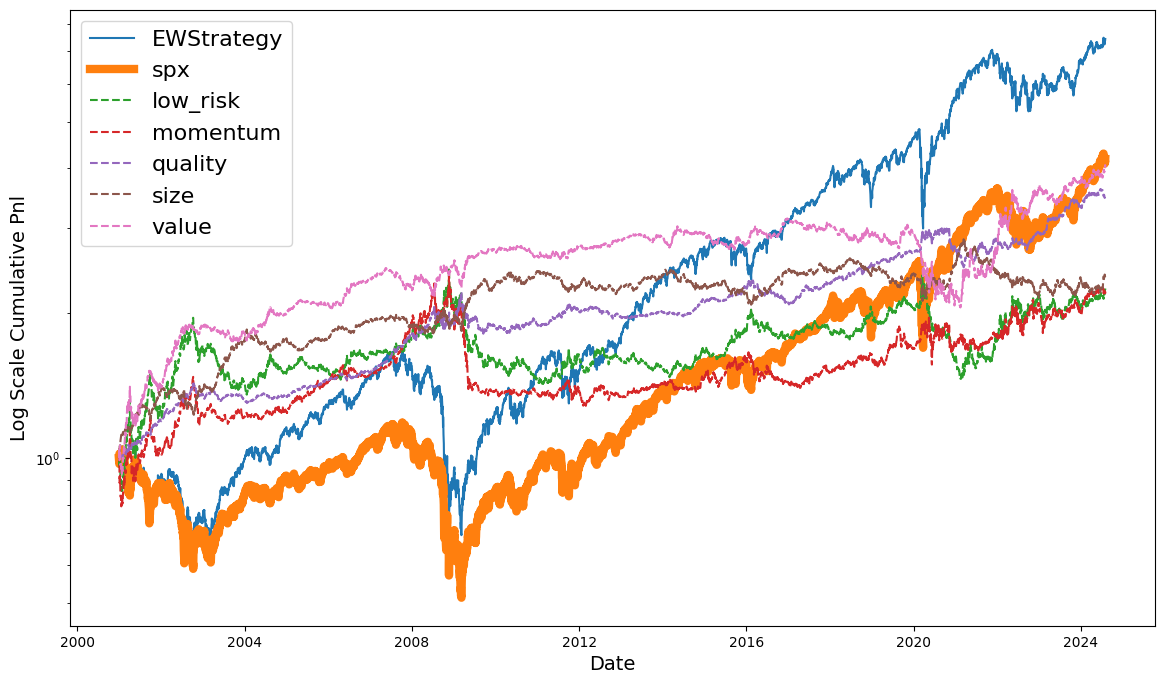

In [9]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

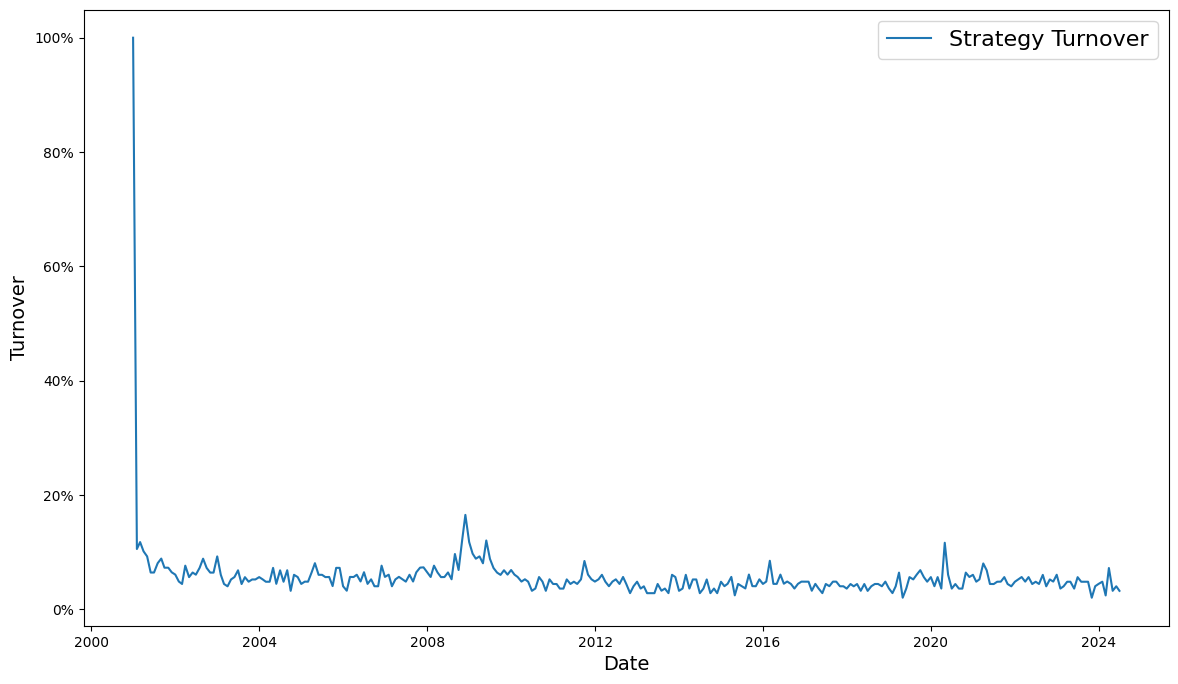

In [10]:
runner.plot_turnover()

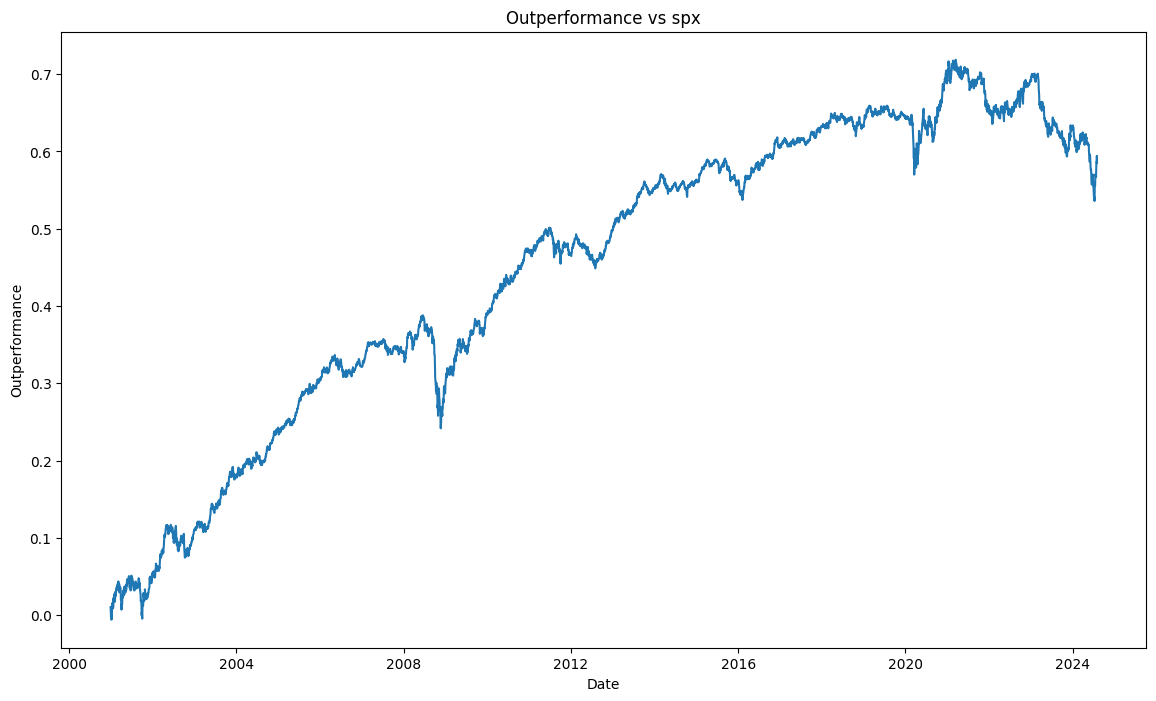

In [11]:
runner.plot_outperformance(mkt_only=True)

In [12]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")